In [65]:
###ipynbファイルをpyファイルで保存することでimportできるようになる
from detect_zip import *
import matplotlib.pyplot as plt
import pickle
import cv2
import numpy as np

In [66]:
#学習済みモデルの読み込み
with open("../digit_recognition/digits_svm.pkl", "rb") as fp:
    clf=pickle.load(fp)

In [67]:
#画像から領域を読み込む
cnts, img=detect_zipno("post_card.png")

(367, 667, 3)


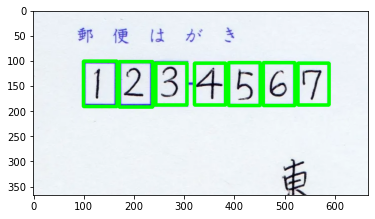

In [68]:
print(img.shape)
plt.imshow(img)

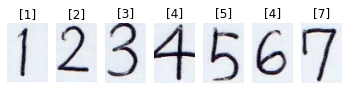

In [70]:
#読み込んだデータをプロット
for i, pt in enumerate(cnts):
    x,y,w,h=pt
    
    #枠線の輪郭分だけ小さくする
    x+=8
    y+=8
    w-=16
    h-=16
    
    #画像データを取りだす
    im2=img[y:y+h, x:x+w]
    
    #データを学習済みモデルに合わせる
    im2gray=cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    im2gray=cv2.resize(im2gray, (8,8))
    
    im2gray=15-im2gray//16
    im2gray=im2gray.reshape((-1,64)) 
    
    
    #データの予測
    result=clf.predict(im2gray)
#     result=np.argmax(result)
    
     #画面に出力
    plt.subplot(1,7,i+1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(str(result))
    
plt.show()